<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

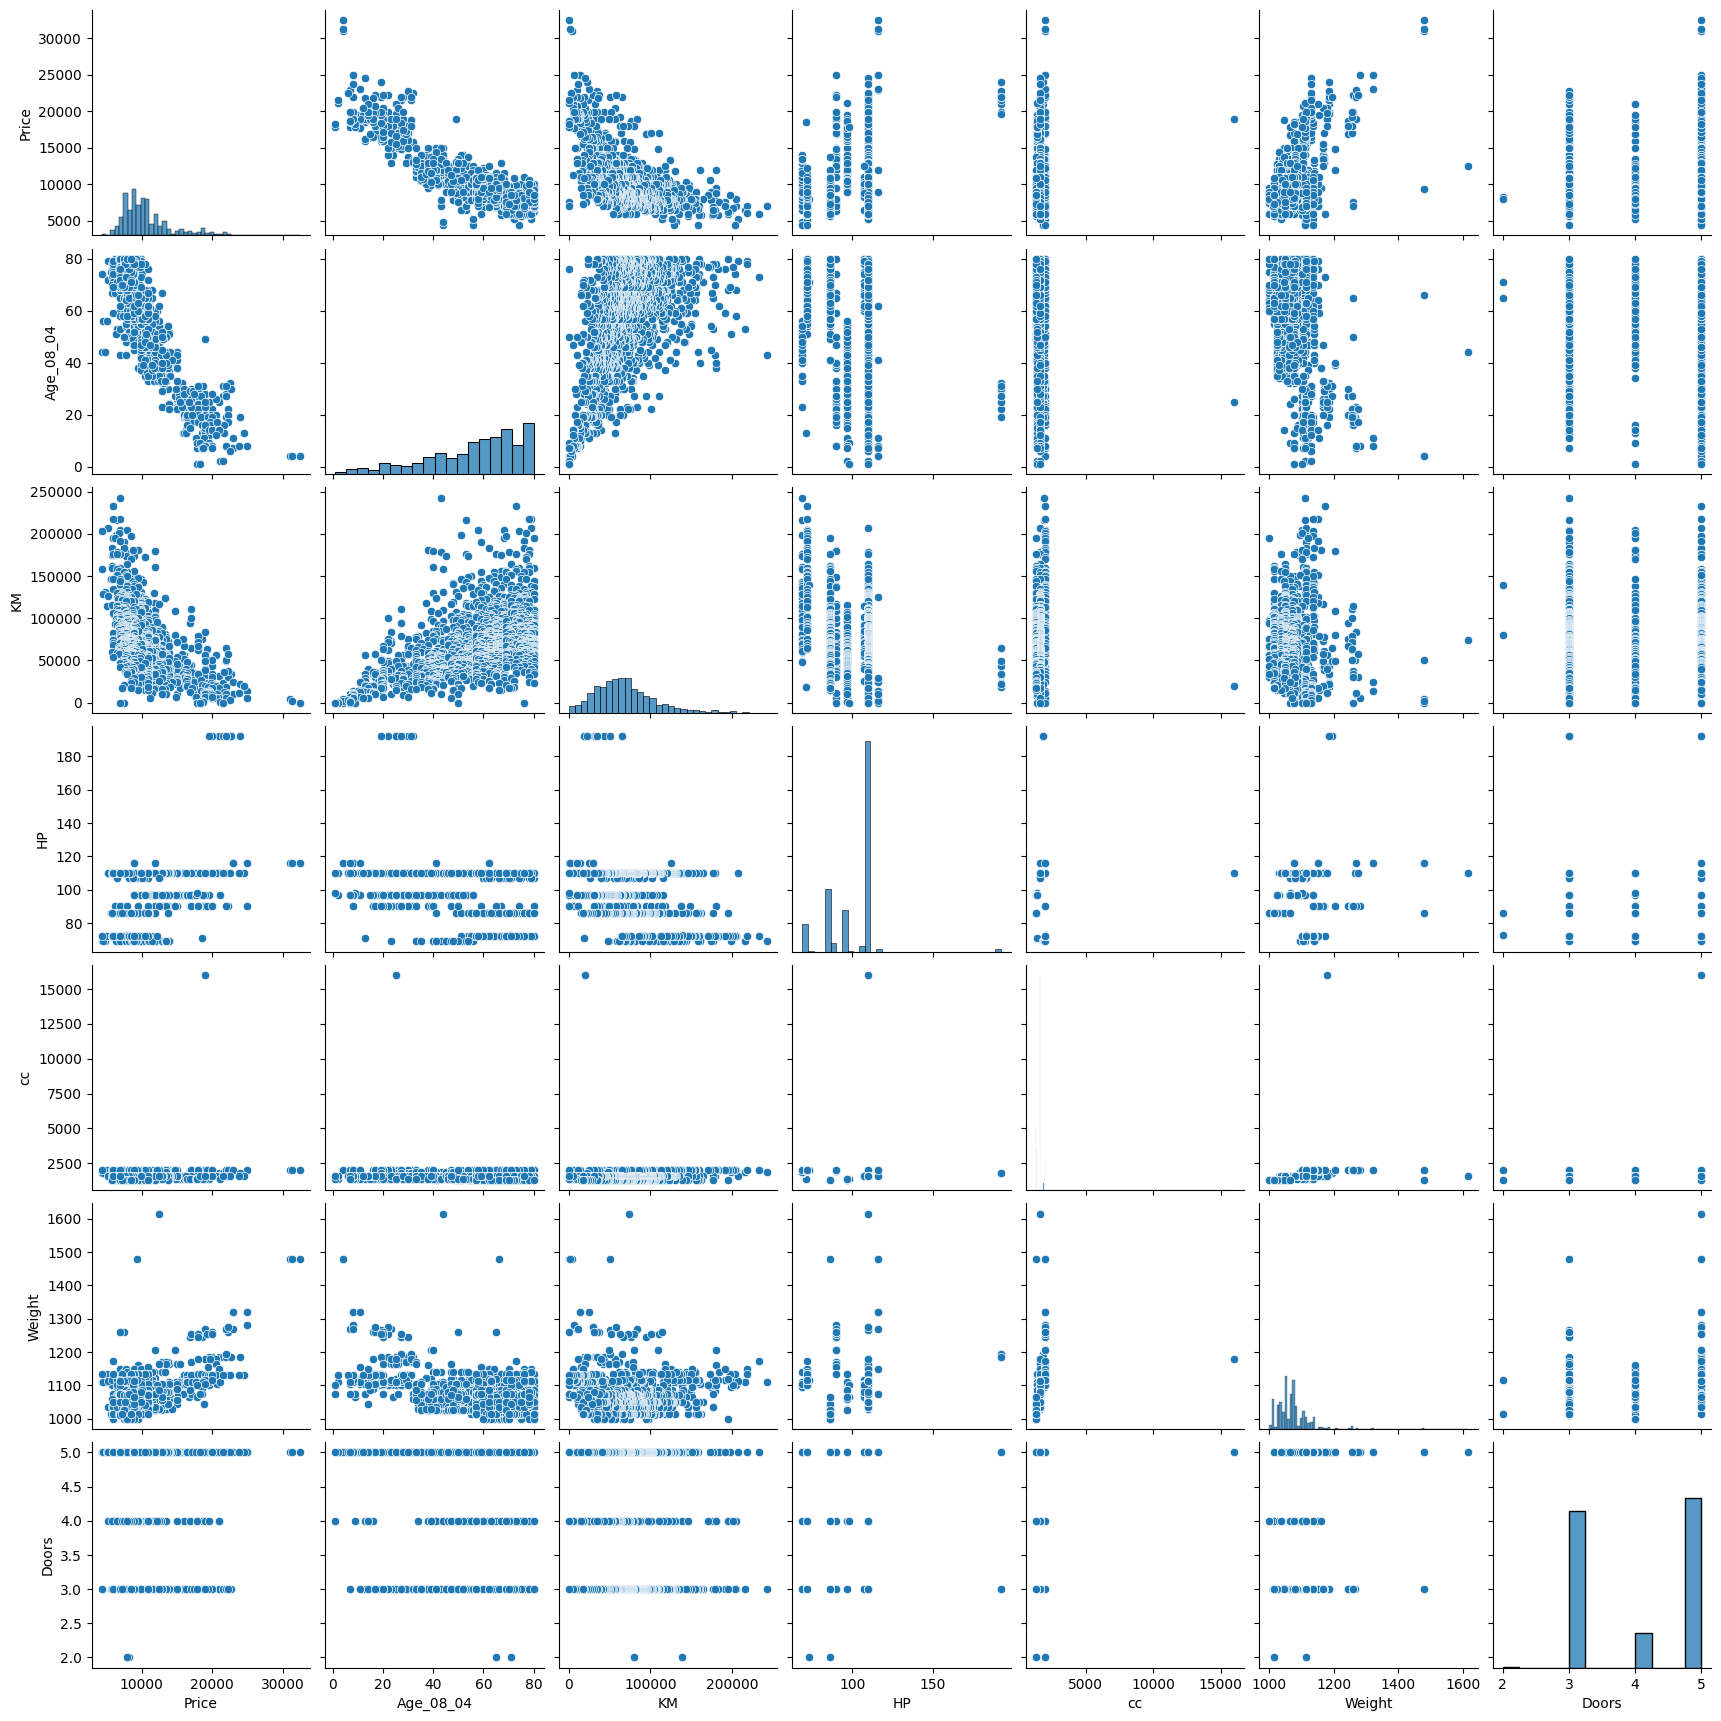

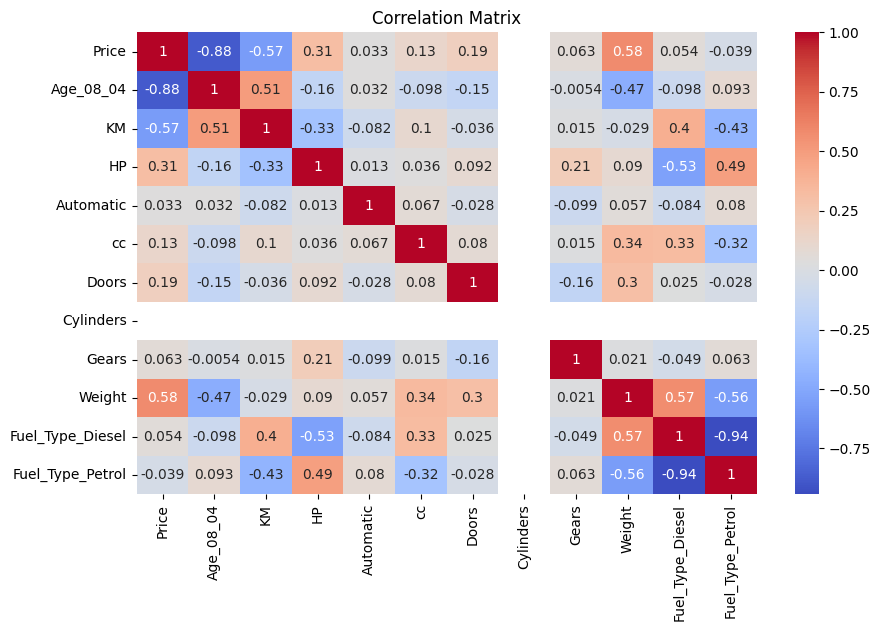

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")  # Make sure the filename is correct
print(df.info())
print(df.describe())

print(df.isnull().sum())
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Doors']]) # Changed 'Age' to 'Age_08_04' and 'CC' to 'cc' based on df.info()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("Model 1 R2 Score:", r2_score(y_test, y_pred1))
print("Model 1 MSE:", mean_squared_error(y_test, y_pred1))
coeff_df = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

X_corr = df[['Age_08_04', 'KM', 'Weight', 'HP', 'Price']]  # Select top correlating features
X2 = X_corr.drop('Price', axis=1)
y2 = X_corr['Price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)

print("Model 2 R2 Score:", r2_score(y2_test, y_pred2))
print("Model 2 MSE:", mean_squared_error(y2_test, y_pred2))

X3 = X.drop(['cc', 'Doors'], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

print("Model 3 R2 Score:", r2_score(y3_test, y_pred3))
print("Model 3 MSE:", mean_squared_error(y3_test, y_pred3))

Model 1 R2 Score: 0.8348888040611082
Model 1 MSE: 2203043.8231437025
                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
Automatic         1.488309e+02
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders        -1.620037e-12
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_Diesel -6.854876e+01
Fuel_Type_Petrol  1.370809e+03
Model 2 R2 Score: 0.8506068681500583
Model 2 MSE: 1993321.0129730701
Model 3 R2 Score: 0.8360180134732874
Model 3 MSE: 2187977.020396675


In [10]:
from sklearn.metrics import mean_absolute_error

def evaluate(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))

evaluate(y_test, y_pred1, "Model 1")
evaluate(y2_test, y_pred2, "Model 2")
evaluate(y3_test, y_pred3, "Model 3")



Evaluation for Model 1:
R2 Score: 0.8348888040611082
MSE: 2203043.8231437025
MAE: 990.8872739193926

Evaluation for Model 2:
R2 Score: 0.8506068681500583
MSE: 1993321.0129730701
MAE: 1001.2017466053621

Evaluation for Model 3:
R2 Score: 0.8360180134732874
MSE: 2187977.020396675
MAE: 996.9071259266756


In [11]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
evaluate(y_test, lasso_pred, "Lasso Regression")

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
evaluate(y_test, ridge_pred, "Ridge Regression")



Evaluation for Lasso Regression:
R2 Score: 0.8354626403967389
MSE: 2195387.2460865397
MAE: 990.9546616159029

Evaluation for Ridge Regression:
R2 Score: 0.8351359377712336
MSE: 2199746.3702333393
MAE: 990.7338342026006
